In [1]:
# Import libraries
import numpy as np
import streamlit as st 
from PIL import Image 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D  
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting 
%matplotlib inline

In [2]:
#Fetch Images count from Folders

# Base directory containing the 'test', 'train', and 'validation' folders
base_dir = 'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images' 

# List of main folders to process
main_folders = ['test', 'train', 'validation']

# Get the list of subfolders
subfolders = [f.name for f in os.scandir(base_dir) if f.is_dir()]

# Print the count of subfolders
print(f'\nVegetables_Images directory has total {len(subfolders)} subfolders')

# Initialize overall total count
overall_total_count = 0

# Loop through each main folder
for main_folder in main_folders:
    folder_path = os.path.join(base_dir, main_folder)
    
    # List all subfolders (15 vegetable categories)
    subfolders = os.listdir(folder_path)
    
    # Initialize total count for the current main folder
    main_folder_count = 0
    
    # Print the main folder name
    print(f"\n{main_folder} folder has the following image counts :\n")
    
    # Loop through each subfolder and count the images
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        image_files = os.listdir(subfolder_path)
        
        # Count the number of images in the subfolder
        image_count = len(image_files)
        
        # Print the subfolder name and image count
        print(f"{subfolder}: {image_count} images")
        
        # Add to the main folder count
        main_folder_count += image_count
    
    # Print the total count for the main folder
    print(f"\nTotal images in {main_folder} folder: {main_folder_count}")
    
    # Add to the overall total count
    overall_total_count += main_folder_count

# Print the overall total count
print(f"\nOverall total images in Vegetables_Images folder has : {overall_total_count} images")


Vegetables_Images directory has total 3 subfolders

test folder has the following image counts :

Bean: 200 images
Bitter_Gourd: 200 images
Bottle_Gourd: 200 images
Brinjal: 200 images
Broccoli: 200 images
Cabbage: 200 images
Capsicum: 200 images
Carrot: 200 images
Cauliflower: 200 images
Cucumber: 200 images
Papaya: 200 images
Potato: 200 images
Pumpkin: 200 images
Radish: 200 images
Tomato: 200 images

Total images in test folder: 3000

train folder has the following image counts :

Bean: 1000 images
Bitter_Gourd: 1000 images
Bottle_Gourd: 1000 images
Brinjal: 1000 images
Broccoli: 1000 images
Cabbage: 1000 images
Capsicum: 1000 images
Carrot: 1000 images
Cauliflower: 1000 images
Cucumber: 1000 images
Papaya: 1000 images
Potato: 1000 images
Pumpkin: 1000 images
Radish: 1000 images
Tomato: 1000 images

Total images in train folder: 15000

validation folder has the following image counts :

Bean: 200 images
Bitter_Gourd: 200 images
Bottle_Gourd: 200 images
Brinjal: 200 images
Broccoli

# Visualise the Images

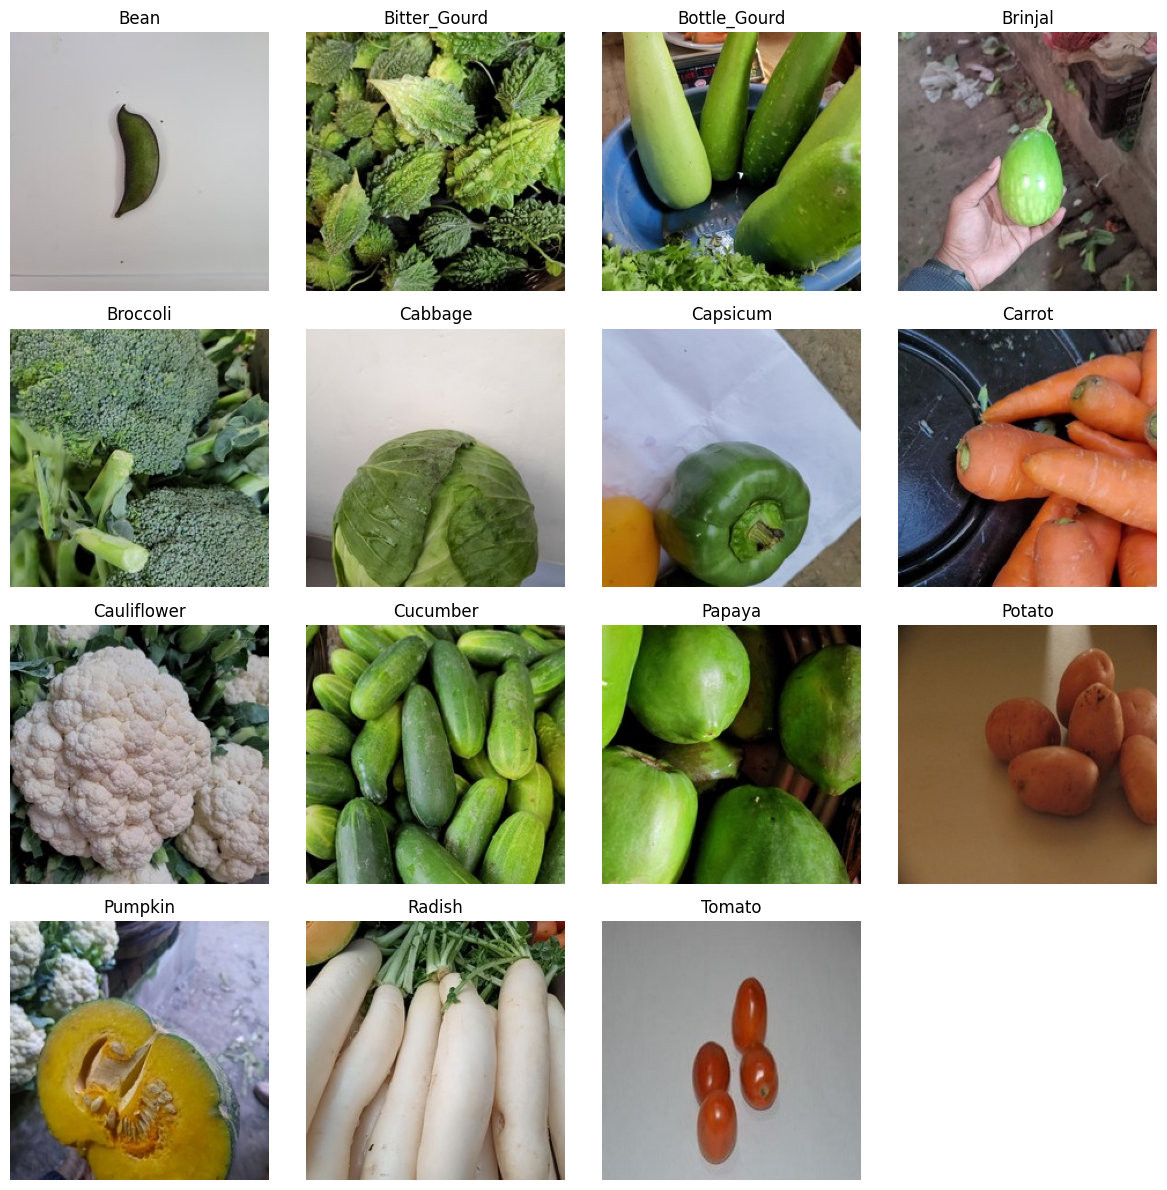

In [3]:
# Let's plot a few images
test_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/test'
train_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'
validation_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/validation'

image_categories = os.listdir(train_path)

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories[:15]):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_images(image_categories)     

# Prepare the Dataset

In [4]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [5]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Found 15000 images belonging to 15 classes.


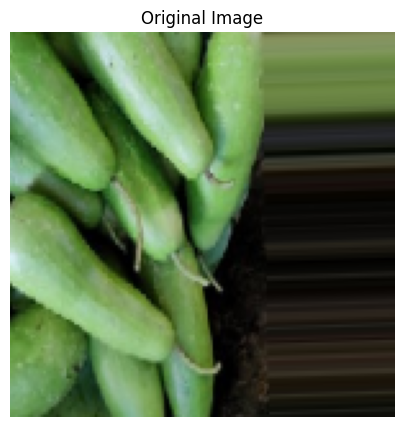

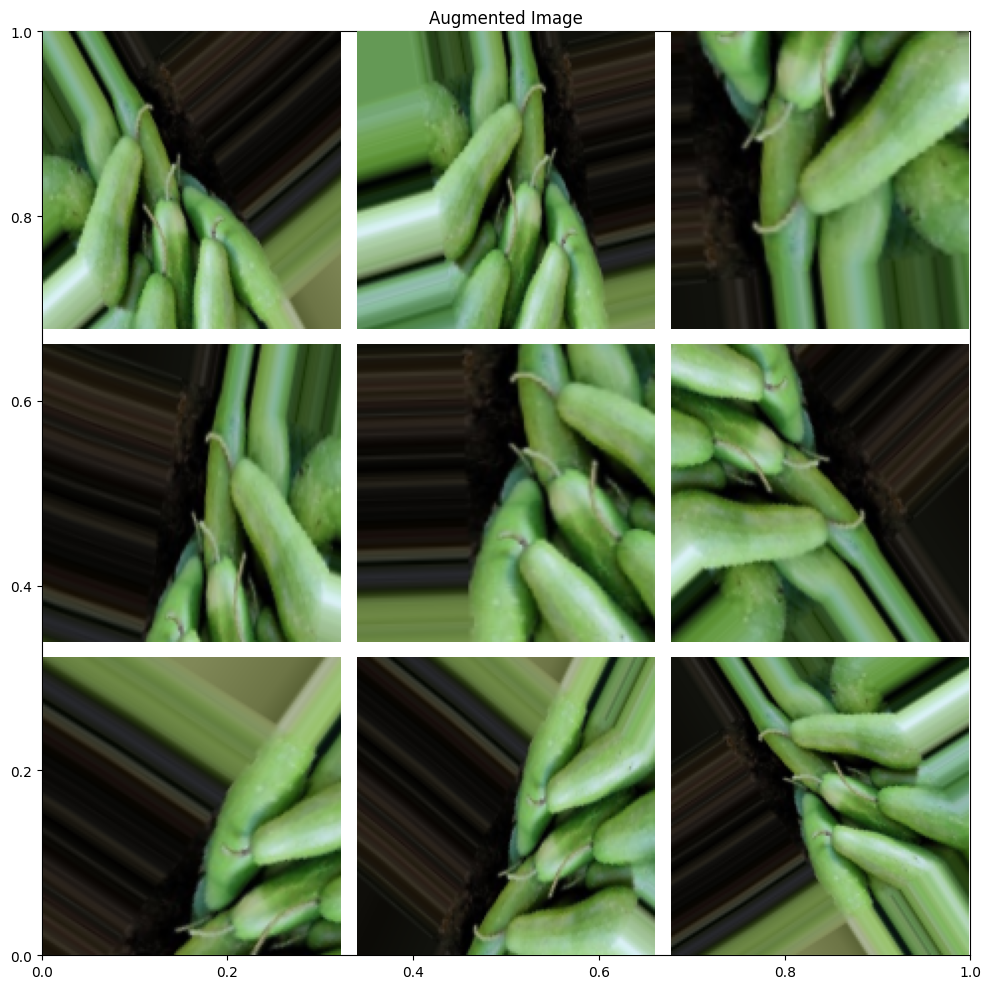

In [6]:
# Data augmentation
data_augmentation = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Verify the training path exists
train_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'
if not os.path.exists(train_path):
    print(f"Path does not exist: {train_path}")

# Load training data using flow_from_directory
train_gen = data_augmentation.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

# Get one batch of images
images, labels = next(train_gen)

# Choose one image to apply augmentations
if images.shape[0] > 0:
    single_image = images[0]
else:
    print("No images found in the batch.")

# Visualize the original image to ensure it loads correctly
plt.figure(figsize=(5, 5))
plt.imshow(single_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Visualize some augmented versions of the single image
plt.figure(figsize=(10, 10))

plt.title("Augmented Image")
for i in range(9):
    augmented_image = data_augmentation.random_transform(single_image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

In [8]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [9]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# Building a CNN model

In [10]:
# Build your model on top of the pre-trained 
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu')),  
model.add(Dense(15, activation='softmax')), 

# Print the model summary 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,815,951 (64.15 MB)

 Trainable params: 9,180,687 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [11]:
# Compile and fit the model
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True) 
# early_stopping = keras.callbacks.EarlyStopping(patience=25) # Set up callbacks
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Set up the optimizer with the specified learning rate 
# optimizer = Adam(learning_rate=0.00001)

# Compile the model with the specified optimizer and loss function 
model.compile(optimizer=keras.optimizers.RMSprop(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 #verbose=1, 
                 validation_data=val_image_generator) 
                 #steps_per_epoch = 15000//64, 
                 #validation_steps = 3000//64
                 #callbacks=[early_stopping, reduce_lr])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1425s 6s/step - accuracy: 0.5559 - loss: 1.6102 - val_accuracy: 0.9530 - val_loss: 0.1873
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1393s 6s/step - accuracy: 0.9720 - loss: 0.1209 - val_accuracy: 0.9887 - val_loss: 0.0580
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1435s 6s/step - accuracy: 0.9942 - loss: 0.0346 - val_accuracy: 0.9903 - val_loss: 0.0425
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1312s 6s/step - accuracy: 0.9973 - loss: 0.0155 - val_accuracy: 0.9947 - val_loss: 0.0268
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1298s 6s/step - accuracy: 0.9989 - loss: 0.0068 - val_accuracy: 0.9930 - val_loss: 0.0253
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1294s 6s/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.9943 - val_loss: 0.0209
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3008s 13s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9960 - val_loss: 0.0188
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1377s 6s/step - accuracy: 0.9998 - loss: 8.5900e-

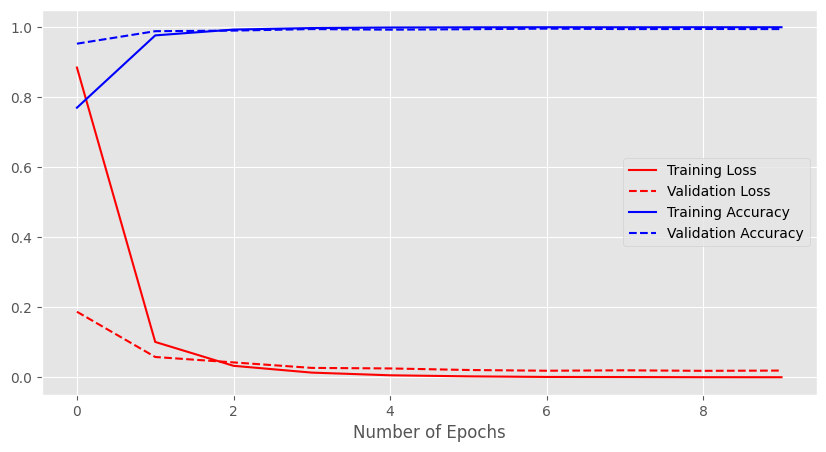

In [12]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [13]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

47/47 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.9962 - loss: 0.0123


[0.01908162608742714, 0.9940000176429749]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


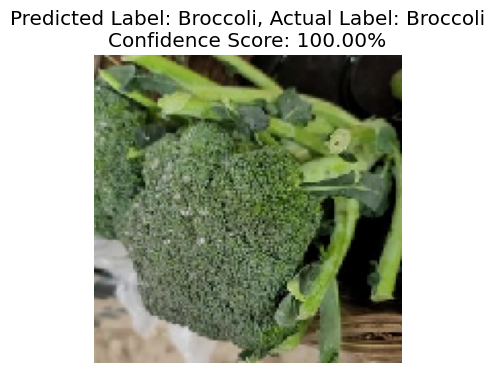

In [14]:
# Testing the Model
test_image_path = 'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images\\test\\Broccoli\\1010.jpg'

# Define the function to generate predictions and plot the image
def generate_predictions(test_image_path, actual_label):
    # Load and preprocess the image
    test_img = load_img(test_image_path, target_size=(150, 150))  # Adjust target size
    test_img_arr = img_to_array(test_img) / 255.0
    test_img_input = np.expand_dims(test_img_arr, axis=0)

    # Make Predictions
    predictions = model.predict(test_img_input)
    predicted_label = np.argmax(predictions)
    predicted_vegetable = class_map[predicted_label]
    prediction_score = np.max(predictions) * 100

    # Display the image with the predicted and actual labels
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title(f"Predicted Label: {predicted_vegetable}, Actual Label: {actual_label}\nConfidence Score: {prediction_score:.2f}%")
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Call the function
generate_predictions(test_image_path, actual_label='Broccoli')

In [15]:
# Save the model
model.save('Vegetables_Recog_Model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


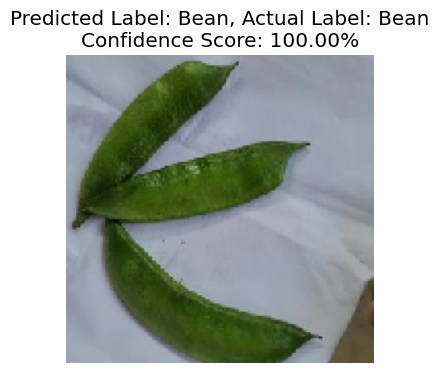

In [16]:
# Generate predictions for external images
external_image_path_1 = "C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\External_Images\\Bean\\0004.jpg"
generate_predictions(external_image_path_1, actual_label='Bean')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


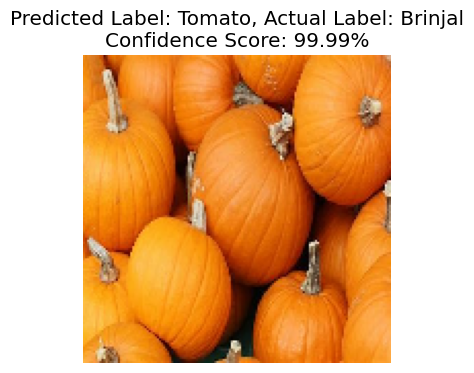

In [29]:
# Generate predictions for external image
external_image_path_2 = "C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\External_Images\\Pumpkin.jpg"
generate_predictions(external_image_path_2, actual_label='Brinjal')

Found 3000 images belonging to 15 classes.
47/47 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step


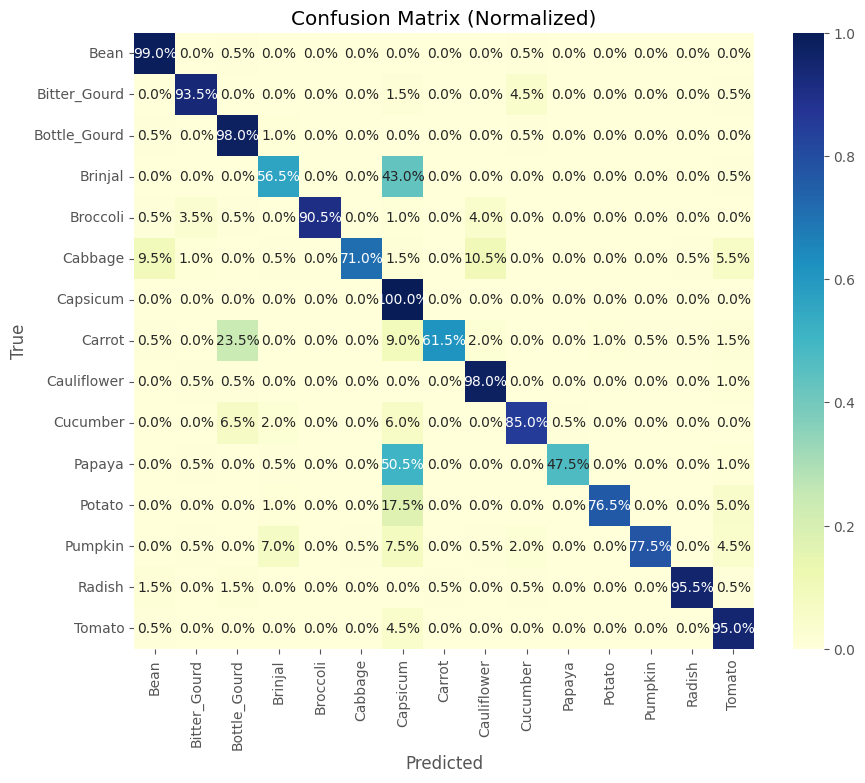

              precision    recall  f1-score   support

        Bean       0.88      0.99      0.93       200
Bitter_Gourd       0.94      0.94      0.94       200
Bottle_Gourd       0.75      0.98      0.85       200
     Brinjal       0.82      0.56      0.67       200
    Broccoli       1.00      0.91      0.95       200
     Cabbage       0.99      0.71      0.83       200
    Capsicum       0.41      1.00      0.58       200
      Carrot       0.99      0.61      0.76       200
 Cauliflower       0.85      0.98      0.91       200
    Cucumber       0.91      0.85      0.88       200
      Papaya       0.99      0.47      0.64       200
      Potato       0.99      0.77      0.86       200
     Pumpkin       0.99      0.78      0.87       200
      Radish       0.99      0.95      0.97       200
      Tomato       0.83      0.95      0.88       200

    accuracy                           0.83      3000
   macro avg       0.89      0.83      0.84      3000
weighted avg       0.89   

In [20]:
# Evaluate the model using test data
test_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    'Vegetables_Images/test',  # Change to the path of your test dataset
    target_size=(150, 150),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)

# Make predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
vegetable_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
cm = confusion_matrix(y_true, y_pred_classes, labels=range(len(vegetable_names)))

# Normalize the confusion matrix by the true classes (rows)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.1%', xticklabels=vegetable_names, yticklabels=vegetable_names, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Normalized)')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=vegetable_names, zero_division=1))